In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\saikr\OneDrive\Desktop\Innobyte Intern\Amazon Sale Report.csv', encoding_errors='ignore')
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128939 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [4]:
df.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


In [5]:
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 37
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [6]:
df.index

RangeIndex(start=0, stop=128976, step=1)

In [7]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [8]:
# remove unnecessaary columns
df.drop(['New', 'PendingS'],axis = 1, inplace = True)
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


In [9]:
df['fulfilled-by'] = df['fulfilled-by'].fillna('others')

In [10]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,others
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,others


In [11]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128976.000000,128976.000000,121176.000000,128941.000000
mean,64486.130427,0.904401,648.562176,463945.677744
std,37232.897832,0.313368,281.185041,191458.488954
min,0.000000,0.000000,0.000000,110001.000000
25%,32242.750000,1.000000,449.000000,382421.000000
50%,64486.500000,1.000000,605.000000,500033.000000
75%,96730.250000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [12]:
df.isnull().sum()

index                    0
Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Courier Status           0
Qty                      0
currency              7800
Amount                7800
ship-city               37
ship-state              35
ship-postal-code        35
ship-country            35
B2B                      0
fulfilled-by             0
dtype: int64

In [13]:
df.dropna(inplace = True)

In [14]:
len(df.index)

121141

In [15]:
df.drop(['index'],axis =1, inplace = True)

In [16]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,others
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,others


In [17]:
df['Date'] = pd.to_datetime(df['Date'])

In [18]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,others
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,others


In [19]:
df.dtypes

Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Category                      object
Size                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code             float64
ship-country                  object
B2B                             bool
fulfilled-by                  object
dtype: object

In [20]:
df.describe()

,Qty,Amount,ship-postal-code
count,121141.000000,121141.000000,121141.000000
mean,0.961252,648.571047,463627.647568
std,0.214277,281.194041,191300.730807
min,0.000000,0.000000,110001.000000
25%,1.000000,449.000000,382421.000000
50%,1.000000,605.000000,500032.000000
75%,1.000000,788.000000,600020.000000
max,8.000000,5584.000000,989898.000000


In [21]:
categories = df.groupby('Category')['Amount'].agg(['sum','mean','max','min','std'])
categories.reset_index(inplace = True)
categories


,Category,sum,mean,max,min,std
0,Blazzer,11214369.12,762.778474,2860.00,0.0,167.762515
1,Perfume,789419.66,723.574390,1449.00,0.0,264.433187
2,Shirt,21289304.08,455.922563,2796.00,0.0,148.837429
3,Shoes,124752.76,799.697179,2058.00,0.0,202.269333
4,Socks,150757.50,358.946429,1028.58,0.0,116.869824
5,T-shirt,39195805.65,833.315028,5584.00,0.0,293.345215
6,Trousers,5344813.30,526.219681,1797.00,0.0,149.087375
7,Wallet,458408.18,520.327106,1266.66,0.0,175.186331
8,Watch,915.00,305.000000,305.00,305.0,0.000000


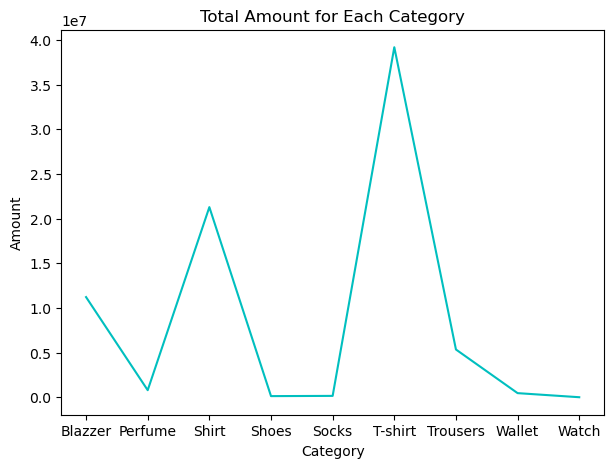

In [22]:
plt.figure(figsize = (7,5))
sns.lineplot(data = categories, x = 'Category', y = 'sum', color = 'c')
plt.title("Total Amount for Each Category")
plt.ylabel("Amount")
plt.show()

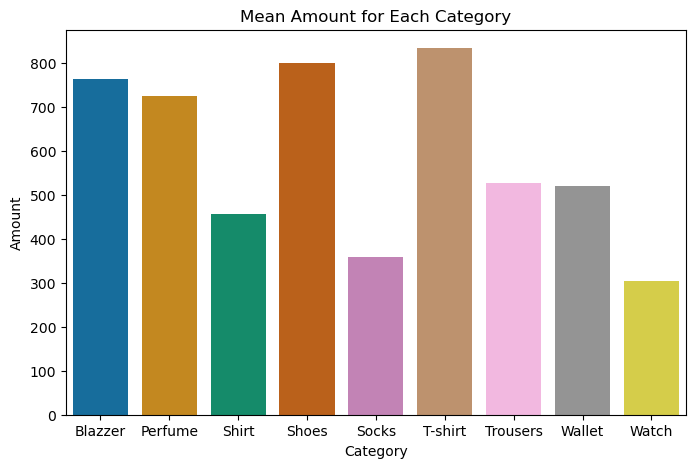

In [23]:
plt.figure(figsize = (8,5))
sns.barplot(data = categories, x = 'Category', y = 'mean', palette = 'colorblind')
plt.ylabel("Amount")
plt.title("Mean Amount for Each Category")
plt.show()

In [24]:
quantities = df.groupby('Category')['Qty'].agg(['sum','mean','max','min','std'])
quantities.reset_index(inplace = True)
quantities

,Category,sum,mean,max,min,std
0,Blazzer,13938,0.948034,4,0,0.237367
1,Perfume,1051,0.963336,2,0,0.202130
2,Shirt,44954,0.962715,5,0,0.215083
3,Shoes,153,0.980769,3,0,0.288962
4,Socks,398,0.947619,2,0,0.262390
5,T-shirt,45215,0.961285,8,0,0.211224
6,Trousers,9891,0.973811,3,0,0.180541
7,Wallet,844,0.958002,3,0,0.246443
8,Watch,3,1.000000,1,1,0.000000


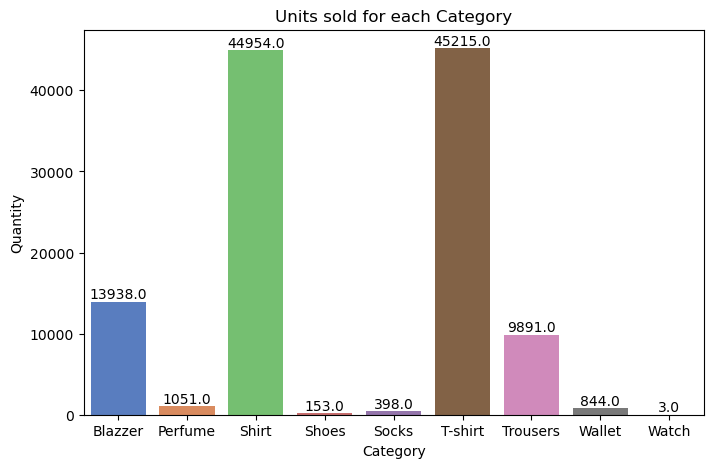

In [25]:
plt.figure(figsize = (8,5))
ax = sns.barplot(data = quantities, x = 'Category', y = 'sum', palette = 'muted')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
#     print(p)
plt.ylabel("Quantity")
plt.title("Units sold for each Category")
plt.show()

In [40]:
grouped_month = df.groupby(pd.Grouper(key='Date', freq='M'))["Amount"].agg(['sum','mean','min','max'])
grouped_month.reset_index(inplace = True)
grouped_month["Month"] = grouped_month["Date"].dt.strftime('%B')
grouped_month

,Date,sum,mean,min,max,Month
0,2022-03-31,101683.85,627.678086,248.0,1799.0,March
1,2022-04-30,28827790.27,626.024241,0.0,5584.0,April
2,2022-05-31,26218621.75,663.359522,0.0,3036.0,May
3,2022-06-30,23420449.38,661.482500,0.0,2894.0,June


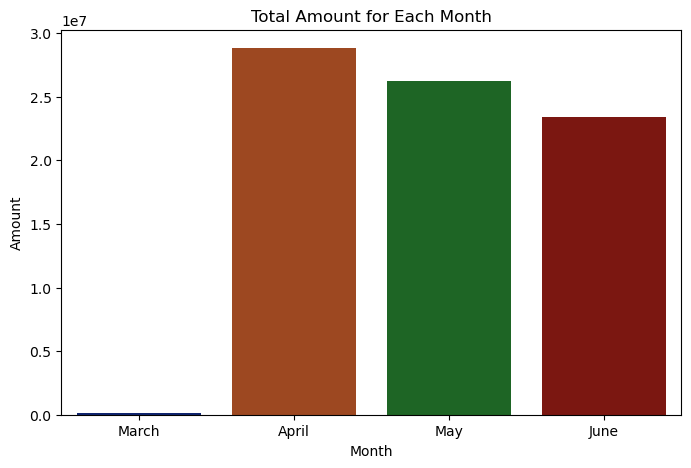

In [43]:
plt.figure(figsize = (8,5))
sns.barplot(data = grouped_month, x = 'Month', y = 'sum', palette = 'dark')
plt.ylabel("Amount")
plt.title("Total Amount for Each Month")
plt.show()